# Tutorial of PySpark on Titanic Dataset

Apache Spark is an open-source distributed framework that is used for Big Data analysis. 
Pyspark is the Python API for Apache Spark, equipped with libraries such as PySparkSQL and MLlib.

<img src="distributed-computing-with-spark-7-638.jpg" alt="distributed computing image" width ="400"/>
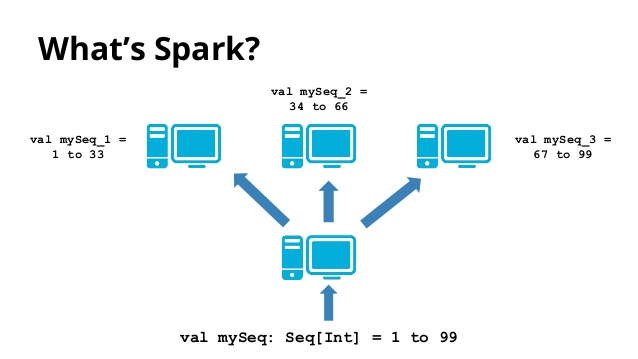

In [80]:
!pip install pandas_profiling
import pandas_profiling

In [33]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression

spark = SparkSession.builder.appName('titanic_logreg').getOrCreate()
df = spark.read.csv('titanic.csv', inferSchema = True, header = True)
df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

## Explore Data

In [34]:
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [35]:
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [36]:
titanic_df = df.toPandas()
titanic_df.sample(5)
#note:
#"sibsp" == Number of Siblings/Spouses Aboard
#"parch" == Number of Parents/Children Aboard

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"""Yrois, Miss. Henriette (""""Mrs Harbeck"""")""",female,24.0,0,0,248747,13.0000,None,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,None,C
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S


In [37]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int32  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(5), object(5)
memory usage: 66.3+ KB


In [38]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Pre-processing

In [39]:
# Drop PassengerId, Cabin, Ticket
my_col = df.select(['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [40]:
final_data = my_col.na.drop()
final_data.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int32  
 1   Pclass    712 non-null    int32  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int32  
 5   Parch     712 non-null    int32  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int32(4), object(2)
memory usage: 33.5+ KB


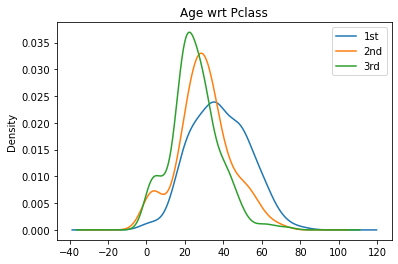

In [106]:
for x in [1,2,3]:    ## for 3 classes
    final_data.toPandas().Age[final_data.toPandas().Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

In [83]:
final_data.toPandas().profile_report()

## VectorAssembler, StringIndexer, VectorIndexer, OneHotEncoder

A <b>transformer</b> converts one data frame to another, oftentimes appending or combining columns.The transformers below are considered <b>feature transformers</b>, as they transform specific features in the data frame instead of the whole dataframe itself.

* <b>VectorAssembler</b>: combines a given list of columns into one single vector. Often used to combine raw features and features generated by other feature transformers into one feature vector. 
* <b>StringIndexer:</b> encodes a string column of labels to a column of label indices
* <b>VectorIndexer:</b> takes an input column in vector form, decides which values are categorical and changes those values to indices. This is often used for Decision Trees and Tree Ensembles.
* <b>OneHotEncoder:</b> maps a categorical feature, represented as a label index, to a binary vector. Each binary entry in that vector indicates the presence of a certain feature value out of the all the categorical features.

In [41]:
from pyspark.ml.feature import (VectorAssembler, StringIndexer, VectorIndexer, OneHotEncoder)

gender_indexer = StringIndexer(inputCol = 'Sex', outputCol = 'SexIndex')
gender_encoder = OneHotEncoder(inputCol='SexIndex', outputCol = 'SexVec')

In [42]:
embark_indexer = StringIndexer(inputCol = 'Embarked', outputCol = 'EmbarkIndex')
embark_encoder = OneHotEncoder(inputCol = 'EmbarkIndex', outputCol = 'EmbarkVec')

In [43]:
assembler = VectorAssembler(inputCols = ['Pclass', 'SexVec', 'Age', 'SibSp', 'Parch', 'Fare', 'EmbarkVec'], outputCol = 'features')

## What is a Pipeline?

Spark represents the machine learning workflow using functions called transformers and estimators, located within a pipeline that links these functions together. 

As mentioned earlier, a <b>transformer</b> converts one data frame to another, oftentimes appending or combining columns. An <b>estimator</b> is an algorithm that fits or trains  data in some way, producing a model for that data.

A <b>pipeline</b> is a series of pipeline stages linked together. Pipeline stages are either transformers and estimators. Our pipeline below consists of 6 stages. It links the feature transformers of gender_indexer, embark_indexer, gender_encoder, embark_encoder and assembler, with our estimator, log_reg.

<img src="ml-Pipeline.png" width="500">
<img src="ml-PipelineModel.png" width="500">

In [44]:
from pyspark.ml import Pipeline

log_reg = LogisticRegression(featuresCol = 'features', labelCol = 'Survived')

In [45]:
pipeline = Pipeline(stages = [gender_indexer, embark_indexer, 
                             gender_encoder, embark_encoder,
                             assembler, log_reg])

In [46]:
train, test = final_data.randomSplit([0.7, 0.3])

The Estimator class has a <b>fit()</b> function which is called on the train data frame, passing that data through the stages of our pipeline. The fit() function trains and creates a linear regression model (we call it fit_model) that we can now pass data into, in order to make predictions as to whether a passenger died or survived. 

Our fitted pipeline, fit_model, is a <b>transformer</b>. It transforms data frames of passenger information into dataframes that include predictions by calling the Transformer class' transform() function on our test data set.

In [47]:
fit_model = pipeline.fit(train)

In [48]:
results = fit_model.transform(test)

In [61]:
results.select('prediction', 'Survived').show(3)

+----------+--------+
|prediction|Survived|
+----------+--------+
|       1.0|       0|
|       1.0|       0|
|       1.0|       0|
+----------+--------+
only showing top 3 rows



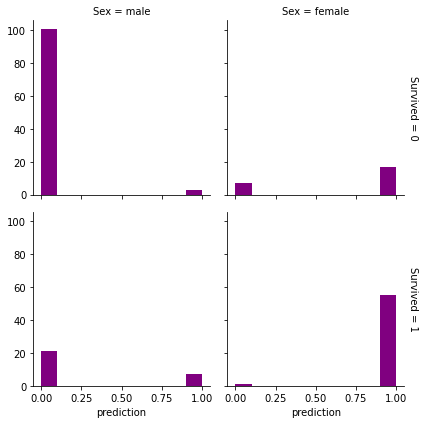

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt       ## wonderful library for data plotting
g = sns.FacetGrid(results.toPandas(), col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "prediction",color="purple");

## Add metrics, graphs and performance analysis here

In [50]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

eval = BinaryClassificationEvaluator(rawPredictionCol = 'rawPrediction', labelCol = 'Survived')
AUC = eval.evaluate(results)
AUC

0.8555152529761912

## Visualization

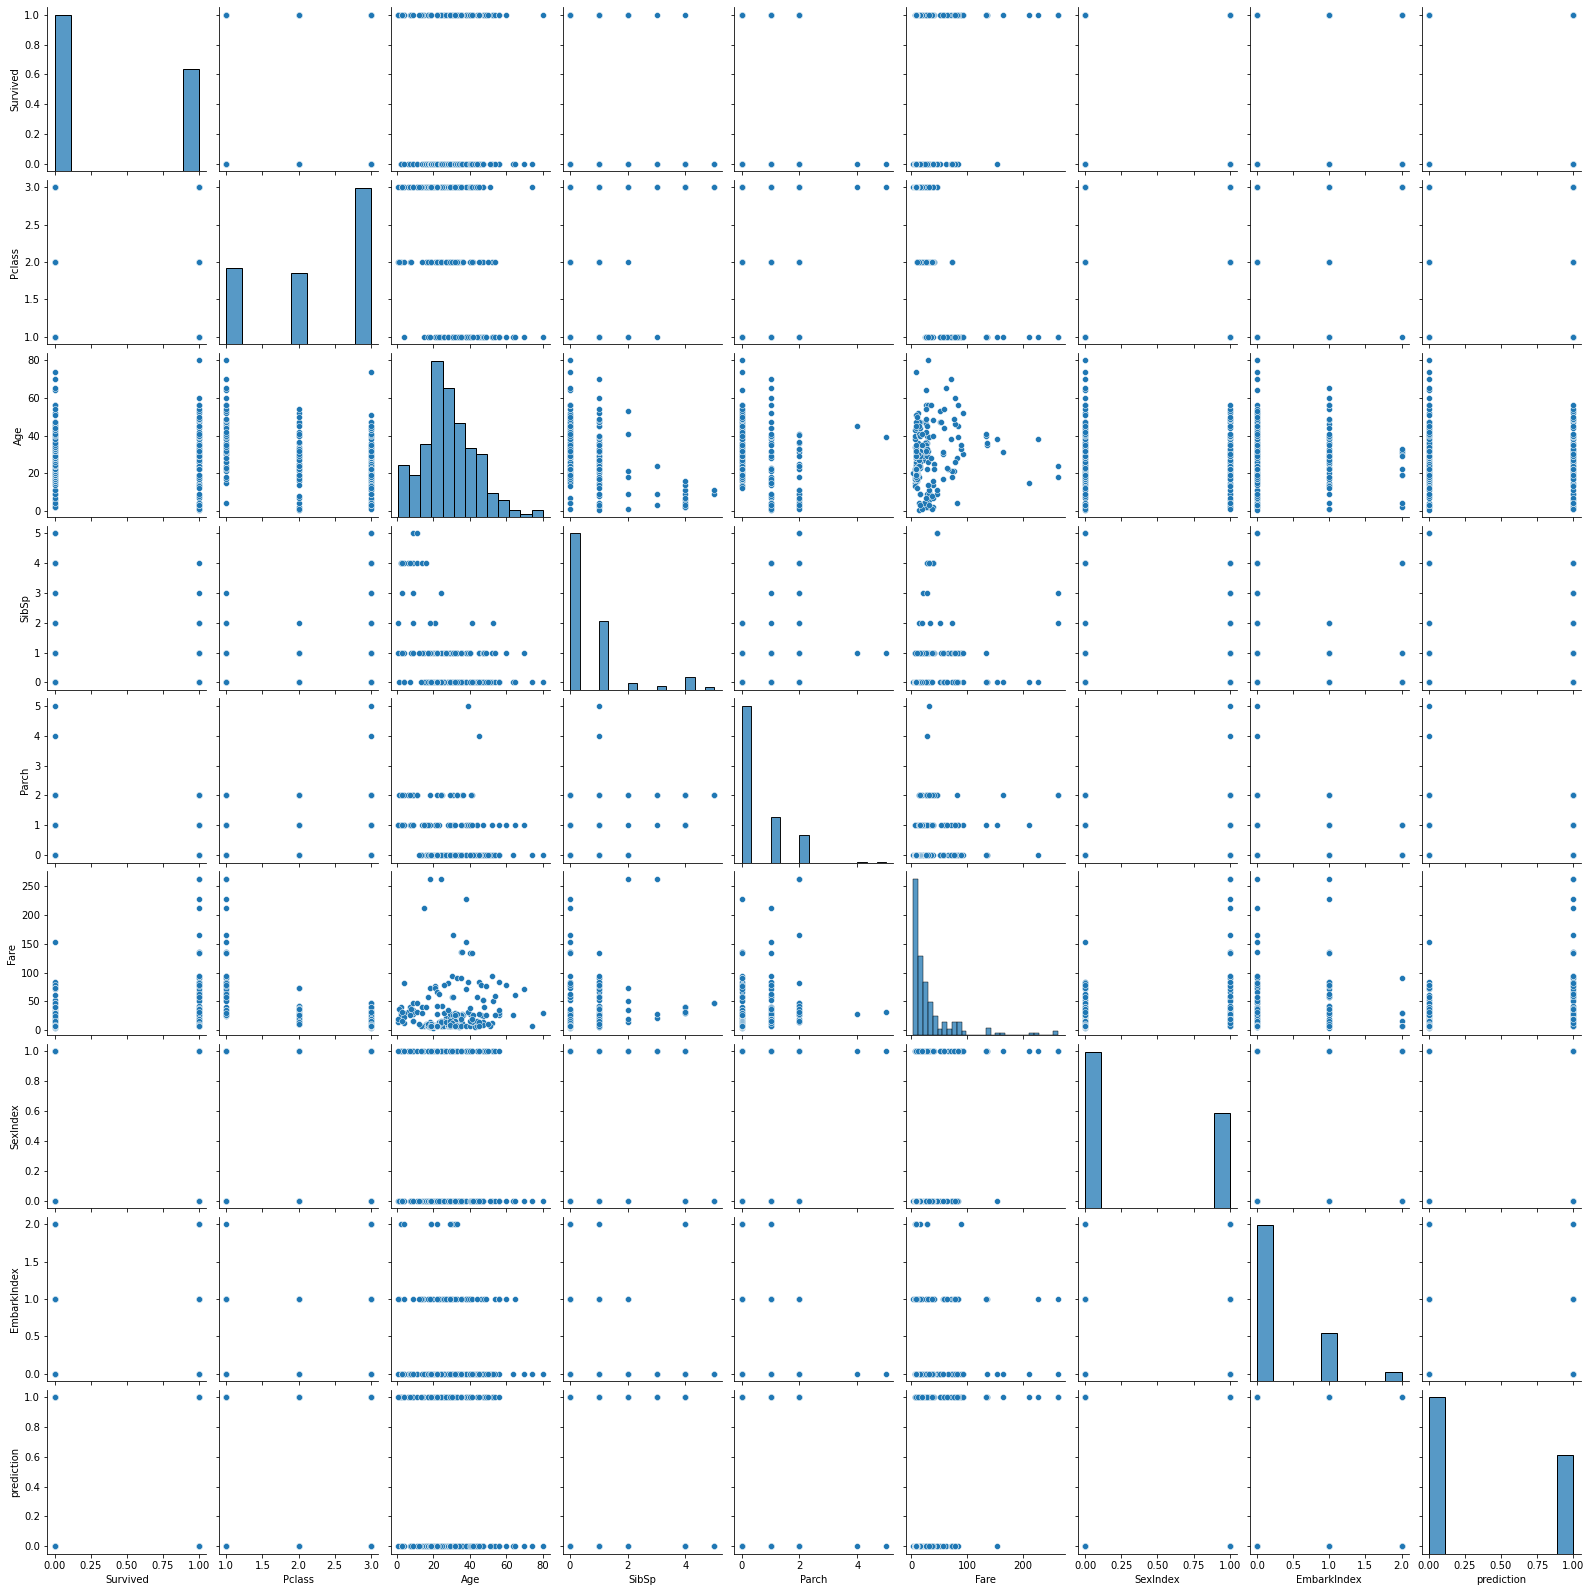

In [119]:
type(results)
g = sns.pairplot(results.toPandas())
#metrics_a = BinaryClassificationMetrics(score_and_labels)
#print(metrics_a.areaUnderROC)
#print(metrics_a.areaUnderPR)


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


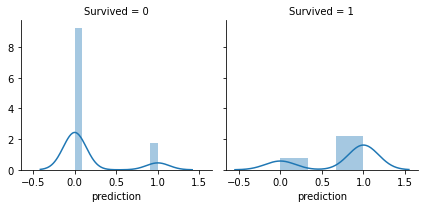

In [74]:
g = sns.FacetGrid(results.toPandas(),col='Survived')
g = g.map(sns.distplot,'prediction') #was age